In [1]:
import matplotlib.pyplot as plt
import numpy as np
import constant

C:\Users\haime\AppData\Local\Temp\ipykernel_37608\2849619698.py:77: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i].set_ylim([0, 2000])  # Adjust the ylim to match the range of yticks
C:\Users\haime\AppData\Local\Temp\ipykernel_37608\2849619698.py:77: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i].set_ylim([0, 2000])  # Adjust the ylim to match the range of yticks
C:\Users\haime\AppData\Local\Temp\ipykernel_37608\2849619698.py:77: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i].set_ylim([0, 2000])  # Adjust the ylim to match the range of yticks
C:\Users\haime\AppData\Local\Temp\ipykernel_37608\2849619698.py:77: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i].set_ylim([0, 2000])  # Adjust the ylim to match the range of yticks


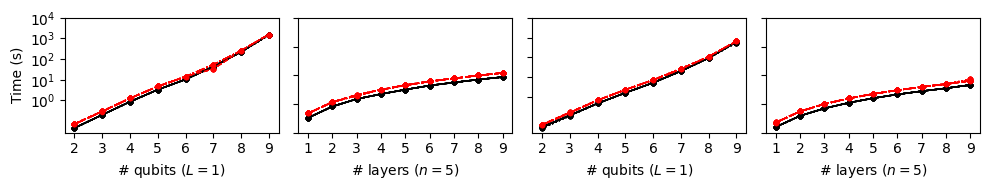

In [53]:
power_cad113 = np.transpose(np.array([
    [28.5, 28.7, 92.0, 27.6, 27.8],
    [29.7, 30.0, 55.9, 29.1, 29.1],
    [29.1, 30.0, 36.0, 29.7, 28.6],
    [28.9, 29.1, 33.0, 29.1, 29.2],
    [29.5, 29.0, 32.4, 29.0, 29.4],
    [29.0, 29.3, 29.3, 29.7, 29.0],
    [30.0, 30.0, 31.0, 29.5, 29.5],
    [30.0, 29.9, 30.0, 30.1, 29.9]
]))

power_wonder40 = np.transpose(np.array([
    [39.5, 38.5, 109.0, 39.0, 39.0],
    [41.0, 39.0, 102.0, 39.0, 39.0],
    [41.0, 39.0, 60.0, 39.0, 39.1],
    [38.8, 39.0, 55.5, 39.0, 39.0],
    [40.0, 39.0, 49.0, 38.8, 39.5],
    [40.0, 40.0, 40.0, 39.0, 39.0],
    [50.0, 50.0, 50.0, 50.0, 50.0],
    [70.0, 70.0, 70.0, 70.0, 70.0]
]))


layers = list(range(1, 10))
qubits = list(range(2, 10))

# times_cad113_vs_layers = np.loadtxt(f"./data/time/cad113/times_2qubit_{num_layer}layer_g2gn.txt")
# times_cad113_vs_qubits = np.loadtxt(f"./data/time/cad113/times_{num_qubits}qubit_1layer_g2gn.txt")
# times_wonder40_vs_layers = np.loadtxt(f"./data/time/wonder40/times_2qubit_{num_layer}layer_g2gn.txt")
# times_wonder40_vs_qubits = np.loadtxt(f"./data/time/wonder40/times_{num_qubits}qubit_1layer_g2gn.txt")

# num_qubits_edpss = [num_qubits_cad113 ** 2 * power_cad113, num_qubits_wonder40 ** 2 * power_wonder40]
fig, axs = plt.subplots(1, 4, figsize=(10, 2))

for i, computer in enumerate(['cad113', 'wonder40']):
    # ---- qubits ----
    timess = []
    for j, num_qubits in enumerate(qubits):
        times = np.loadtxt(f"./data/time/{computer}/times_{num_qubits}qubit_1layer_g2gn.txt")
        timess.append(times)
    timess = np.transpose(timess)
    for j, num_qubits in enumerate(qubits):
        for k, optimizer in enumerate(constant.optimizers_name):     
            
            axs[i*2].plot(qubits, timess[k], 
                             marker='o', markersize=3, linewidth=1, label=f'{optimizer}', 
                             linestyle=constant.line_styles[k], 
                             color=constant.colors[k])
            axs[i*2].set_xticks(qubits)
            axs[i*2].set_xticklabels(qubits)

    # ---- layers ----
    timess = []
    for j, num_layers in enumerate(layers):
        times = np.loadtxt(f"./data/time/{computer}/times_5qubit_{num_layers}layer_g2gn.txt")
        timess.append(times)
    timess = np.transpose(timess)
    for j, num_layers in enumerate(layers):
        for k, optimizer in enumerate(constant.optimizers_name):     
            axs[i*2 + 1].plot(layers, timess[k], 
                             marker='o', markersize=3, linewidth=1, label=f'{optimizer}', 
                             linestyle=constant.line_styles[k], 
                             color=constant.colors[k])
            axs[i*2 + 1].set_xticks(layers)
            axs[i*2 + 1].set_xticklabels(layers)
    
    

yticks = [1, 10, 100, 1000, 10000]
yticklabels = ['$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$']


for i in range(0, 4):
    if i == 0:
        axs[i].set_ylabel('Time (s)')
    axs[i].set_yscale('log')
    axs[i].set_ylim([0, 2000])  # Adjust the ylim to match the range of yticks
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(yticklabels)
    if i != 0:
        axs[i].set_yticklabels([])
for i in range(0, 4):
    if i % 2 == 1:
        axs[i].set_xlabel(rf'# layers $(n=5)$')
    else:
        axs[i].set_xlabel(rf'# qubits $(L=1)$')
        

        
plt.tight_layout()
plt.savefig('./data/images/times.svg', bbox_inches='tight')

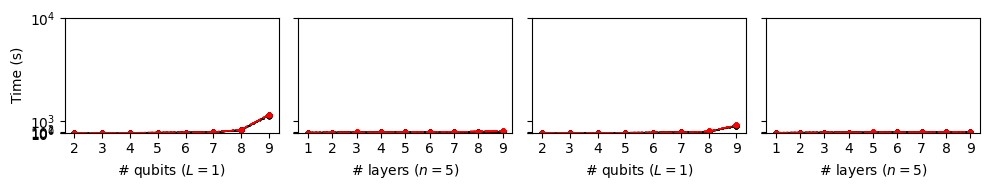

In [3]:
power_cad113 = np.transpose(np.array([
    [28.5, 28.7, 92.0, 27.6, 27.8],
    [29.7, 30.0, 55.9, 29.1, 29.1],
    [29.1, 30.0, 36.0, 29.7, 28.6],
    [28.9, 29.1, 33.0, 29.1, 29.2],
    [29.5, 29.0, 32.4, 29.0, 29.4],
    [29.0, 29.3, 29.3, 29.7, 29.0],
    [30.0, 30.0, 31.0, 29.5, 29.5],
    [30.0, 29.9, 30.0, 30.1, 29.9]
]))

power_wonder40 = np.transpose(np.array([
    [39.5, 38.5, 109.0, 39.0, 39.0],
    [41.0, 39.0, 102.0, 39.0, 39.0],
    [41.0, 39.0, 60.0, 39.0, 39.1],
    [38.8, 39.0, 55.5, 39.0, 39.0],
    [40.0, 39.0, 49.0, 38.8, 39.5],
    [40.0, 40.0, 40.0, 39.0, 39.0],
    [50.0, 50.0, 50.0, 50.0, 50.0],
    [70.0, 70.0, 70.0, 70.0, 70.0]
]))


layers = list(range(1, 10))
qubits = list(range(2, 10))

# times_cad113_vs_layers = np.loadtxt(f"./data/time/cad113/times_2qubit_{num_layer}layer_g2gn.txt")
# times_cad113_vs_qubits = np.loadtxt(f"./data/time/cad113/times_{num_qubits}qubit_1layer_g2gn.txt")
# times_wonder40_vs_layers = np.loadtxt(f"./data/time/wonder40/times_2qubit_{num_layer}layer_g2gn.txt")
# times_wonder40_vs_qubits = np.loadtxt(f"./data/time/wonder40/times_{num_qubits}qubit_1layer_g2gn.txt")

# num_qubits_edpss = [num_qubits_cad113 ** 2 * power_cad113, num_qubits_wonder40 ** 2 * power_wonder40]
fig, axs = plt.subplots(1, 4, figsize=(10, 2))

for i, computer in enumerate(['cad113', 'wonder40']):
    # ---- qubits ----
    timess = []
    for j, num_qubits in enumerate(qubits):
        times = np.loadtxt(f"./data/time/{computer}/times_{num_qubits}qubit_1layer_g2gn.txt")
        timess.append(times)
    timess = np.transpose(timess)
    for j, num_qubits in enumerate(qubits):
        for k, optimizer in enumerate(constant.optimizers_name):     
            
            axs[i*2].plot(qubits, timess[k], 
                             marker='o', markersize=3, linewidth=1, label=f'{optimizer}', 
                             linestyle=constant.line_styles[k], 
                             color=constant.colors[k])
            axs[i*2].set_xticks(qubits)
            axs[i*2].set_xticklabels(qubits)

    # ---- layers ----
    timess = []
    for j, num_layers in enumerate(layers):
        times = np.loadtxt(f"./data/time/{computer}/times_5qubit_{num_layers}layer_g2gn.txt")
        timess.append(times)
    timess = np.transpose(timess)
    for j, num_layers in enumerate(layers):
        for k, optimizer in enumerate(constant.optimizers_name):     
            axs[i*2 + 1].plot(layers, timess[k], 
                             marker='o', markersize=3, linewidth=1, label=f'{optimizer}', 
                             linestyle=constant.line_styles[k], 
                             color=constant.colors[k])
            axs[i*2 + 1].set_xticks(layers)
            axs[i*2 + 1].set_xticklabels(layers)
    
    

yticks = [1, 10, 100, 1000, 10000]
yticklabels = ['$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$']


for i in range(0, 4):
    if i == 0:
        axs[i].set_ylabel('Time (s)')
    #axs[i].set_yscale('log')
    axs[i].set_ylim([0, 2000])  # Adjust the ylim to match the range of yticks
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(yticklabels)
    if i != 0:
        axs[i].set_yticklabels([])
for i in range(0, 4):
    if i % 2 == 1:
        axs[i].set_xlabel(rf'# layers $(n=5)$')
    else:
        axs[i].set_xlabel(rf'# qubits $(L=1)$')
        

        
plt.tight_layout()
# plt.savefig('./data/images/times.svg', bbox_inches='tight')